### _Facets_

Cuando tenemos que analizar y visualizar datos con varias dimensiones suele ser muy útil representar simultáneamente múltiples vistas de diferentes subconjuntos de datos y dimensiones, de forma que nos hagamos una mejor idea de la estructura conjunta de los datos y sus relaciones.

Para ello utilizamos gráficos múltiples organizados en cuadrículas o rejillas. En Seaborn esta organización de gráficos se consigue mediante un objeto `sns.FacetGrid`.

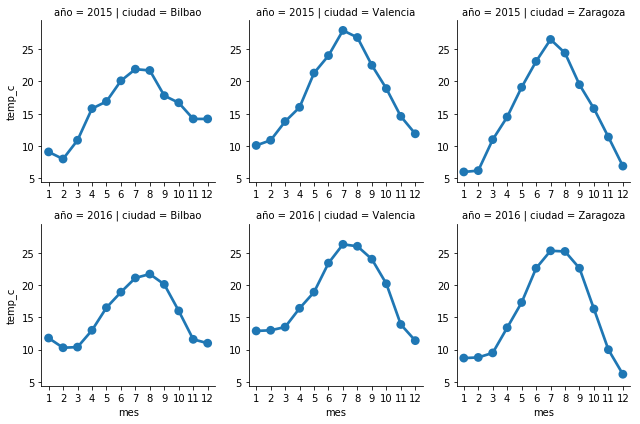

In [ ]:
# Vamos a seleccionar datos de unas pocas ciudades
meteo_bvz = meteo_mes[meteo_mes['ciudad'].isin(['Bilbao','Valencia','Zaragoza'])]

# Pintar una rejilla con tantas filas como años
# y tantas columnas como ciudades;
# en cada panel incluir un gráfico de puntos 
# de temperatura por mes
sns.FacetGrid(meteo_bvz, row='año', col='ciudad').map(sns.pointplot, "mes", "temp_c")

Con `sns.FacetGrid` hemos definido una rejilla con tantas filas como años y tantas columnas como ciudades. Sobre cada celda del grid construido, aplicamos (con `map`) la función gráfica que queremos representar; en este caso un gráfico de puntos (`sns.pointplot`) de temperatura por cada mes.

Si pintas directamente el objeto `sns.FacetGrid`, te mostrará la rejilla con las celdas sin datos.

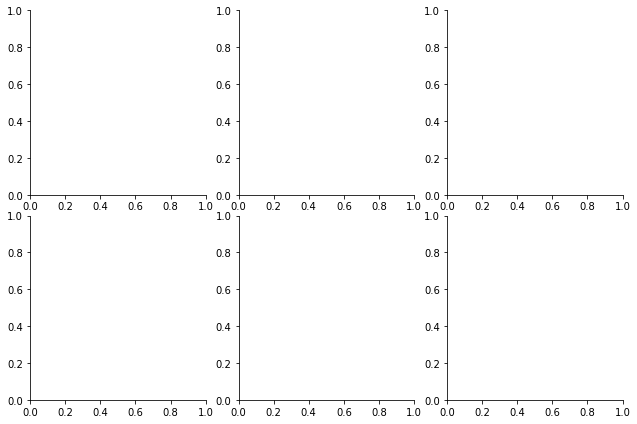

In [ ]:
sns.FacetGrid(meteo_bvz, row='año', col='ciudad')

Podemos utilizar el color (o la forma de los puntos) para representar dimensiones adicionales de los datos.

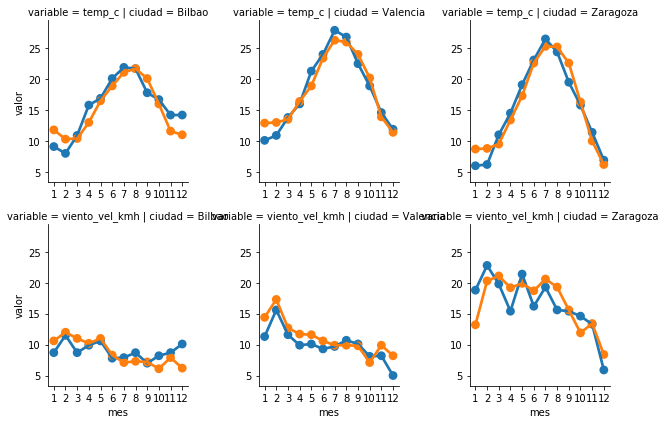

In [ ]:
# Usamos `pd.melt` para pasar de datos en modo 'ancho'
# a modo 'largo' o apilado.
meteo_bvz_long = pd.melt(meteo_bvz, 
                         id_vars=['año','mes','ciudad'], 
                         value_vars=['temp_c','viento_vel_kmh'], 
                         var_name='variable', value_name='valor')

# Ahora en cada fila de la rejilla representamos una variable meteo
# y con el color representamos el año
sns.FacetGrid(meteo_bvz_long, row='variable', col='ciudad', hue='año').map(sns.pointplot, 'mes', 'valor')